<a href="https://colab.research.google.com/github/GuCuChiara/Convertidor-de-Celsius-a-Fahrenheit-con-Python-y-Tensorflow/blob/main/Convertidor_de_Celsius_a_Fahrenheit_con_Python_y_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convertidor de Celsius a Fahrenheit con Python y Tensorflow

In [1]:
# importamos tensorflow y numpy
import tensorflow as tf
import numpy as np
tf_version = f'Versión de tensorflow: {tf.__version__}'
np_version = f'Versión de numpy: {np.__version__}' 
print(tf_version)
print(np_version)

Versión de tensorflow: 2.9.2
Versión de numpy: 1.21.6


# Fórmula:


```
Fahrenheit = Celsius * 1.8 + 32
```




# Código a implementar si usáramos una función con programación regular:
```
def function(C):
    F = C * 1.8 + 32
    return F
```




In [35]:
def conversor():
  valor = input("ingrese un valor numérico: ")
  celsius = float(valor) 
  F = celsius * 1.8 + 32
  resultado= f'El resultado real es {F}'
  print(resultado)

# Deducción del valor en fahrenheit, usando aprendizaje automático:

In [2]:
# Definimos 2 arreglos numéricos de ejemplos de entradas y salidas, en celsius y fahrenheit:
# la red los tomará como entrada para aprender
celsius = np.array([-40, -26, -10, 0, 8, 15, 22, 33, 38, 53], dtype=float)
fahrenheit = np.array([-40, -15, 14, 32, 46, 59, 72, 91, 100, 127], dtype=float)

# Definimos el modelo y las capas de nuestra red:
**importamos keras**

In [46]:
import keras
keras_version = f'Versión de keras: {keras.__version__}' 
print(keras_version)
#capa = tf.keras.layers.Dense(units=1, input_shape=[1]) # una capa oculta + una capa entrada
#modelo = tf.keras.Sequential([capa]) # modelo Sequencial

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1]) # 3 capas ocultas + una capa entrada
oculta2 = tf.keras.layers.Dense(units=3)                  # 3 capas ocultas
oculta3 = tf.keras.layers.Dense(units=3)                  # 3 capas ocultas    
salida = tf.keras.layers.Dense(units=1)                   # 1 capa salida
modelo = tf.keras.Sequential([oculta1, oculta2, oculta3, salida])
modelo.summary()

Versión de keras: 2.9.0
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 3)                 6         
                                                                 
 dense_12 (Dense)            (None, 3)                 12        
                                                                 
 dense_13 (Dense)            (None, 3)                 12        
                                                                 
 dense_14 (Dense)            (None, 1)                 4         
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [47]:
# compilamos el modelo, usamos el optimizador Adam, y definimos la función de pérdida
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [51]:
print("Comenzando entrenamiento...")
# le indicamos al modelo, los datos de entrada (celsius) y los resultados esperados (fahrenheit)
# el número de épocas
historial = modelo.fit(celsius, fahrenheit, epochs=100, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


# Visualizamos los resultados del entrenamiento, vemos la magnitud de pérdida en cada época:

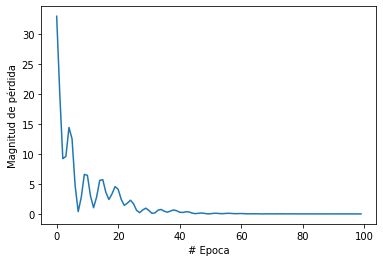

In [52]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [53]:
print("Hagamos una predicción!")
valor = input("ingrese un valor numérico: ")
resultado = modelo.predict([float(valor)])
print("El resultado predicho es " + str(resultado) + " fahrenheit!")
print('------------------------------------------')
print("ingrese muevamente el valor numérico para comparar el cálculo real:")
conversor() #mostramos el cálculo real realizado en la función conversor, con la fórmula de conversión celsius a fahrenheit

Hagamos una predicción!
ingrese un valor numérico: 60
1/1 [==============================] - 0s 25ms/step
El resultado predicho es [[139.7214]] fahrenheit!
------------------------------------------
ingrese muevamente el valor numérico para comparar el cálculo real:
ingrese un valor numérico: 60
El resultado real es 140.0


# Visualizamos los pesos y sesgos asignados:
**recordemos que el resultado va a ser:**

valor ingresado * peso + sesgo = resultado

valor * W + b (bias) = resultado

In [54]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(oculta3.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.23139668,  0.5504722 ,  0.23935051]], dtype=float32), array([-2.6044748,  2.7196417, -1.9648819], dtype=float32)]
[array([[ 0.6612312 ,  1.0015008 ,  0.22538069],
       [-0.24796377, -2.0185657 ,  0.07826124],
       [-0.20577474,  0.9347071 , -0.2596231 ]], dtype=float32), array([-0.76463217, -4.1096163 , -2.8143203 ], dtype=float32)]
[array([[ 0.49557003, -0.3177454 ,  0.00900505],
       [-0.6937976 ,  0.94679713,  1.7885418 ],
       [-0.9136657 ,  0.90487576,  0.3255664 ]], dtype=float32), array([ 3.6524696, -1.8028089, -3.4391577], dtype=float32)]
[array([[ 0.543354  ],
       [-0.03845402],
       [-0.68641853]], dtype=float32), array([3.167548], dtype=float32)]
